# Detecção de novidade
Um conjunto de treinamento sem outliers

# Detecção de outlier
Um conjunto de dados que não sei se está livre de outliers

# Mineração de outlier
Encontrar outliers
Pode ser utilizado para detectar uma fraude

## TAREFA 1: definir quais dados são inconsistentes
## TAREFA 2: encontrar um método que encontre os outliers dado que eu defini o que é um outier

## Box Plot

Uma ferramenta gráfica que indica:
    * Mediana
    * Primeiro e terceiro quartil
    * Limites superior e inferior
    * Outliers
    
    
Limites: 75% DOS DADOS
Caixa: 50% DOS DADOS
    


In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x296b8d66b00>],
 'caps': [<matplotlib.lines.Line2D at 0x296b8d6fe80>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x296b8d77ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x296b8d66cc0>,
  <matplotlib.lines.Line2D at 0x296b8d6fcc0>]}

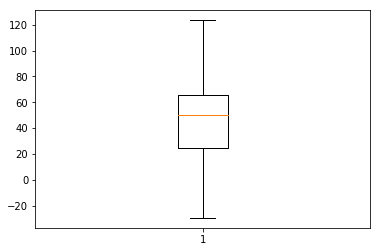

In [16]:

# dados artificiais
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)
plt.boxplot(data, 0, '') ## O risker ou fio de bigode devem ser 


𝐿𝑆 = 𝑄3 + 𝑐𝐷i
𝐿𝐼 = 𝑄1 − 𝑐𝐷i

no geral c = 1,5

{'boxes': [<matplotlib.lines.Line2D at 0x296b8dfe5f8>],
 'caps': [<matplotlib.lines.Line2D at 0x296b8e0bfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x296b8e19898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x296b8e109e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x296b8dfef60>,
  <matplotlib.lines.Line2D at 0x296b8e0b7b8>]}

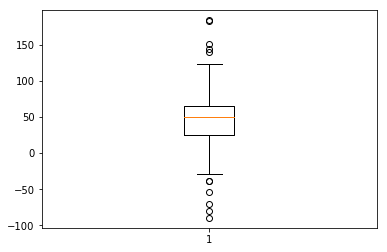

In [17]:
plt.boxplot(data)


{'boxes': [<matplotlib.lines.Line2D at 0x296b8e9bbe0>],
 'caps': [<matplotlib.lines.Line2D at 0x296b8ea4f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x296b8eb2e80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x296b8eabfd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x296b8e9bda0>,
  <matplotlib.lines.Line2D at 0x296b8ea4da0>]}

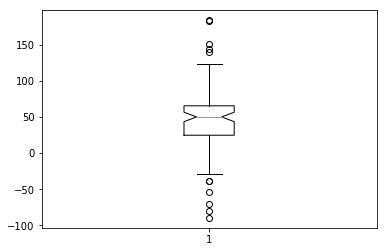

In [18]:
plt.boxplot(data, 1)


{'boxes': [<matplotlib.lines.Line2D at 0x296b8f38f28>],
 'caps': [<matplotlib.lines.Line2D at 0x296b8f4b940>,
 'fliers': [<matplotlib.lines.Line2D at 0x296b8f53b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x296b8f53358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x296b8f458d0>,
  <matplotlib.lines.Line2D at 0x296b8f45ac8>]}

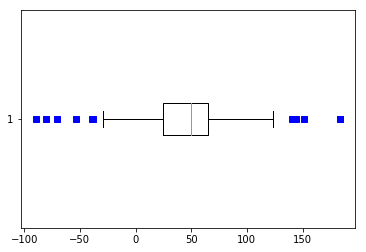

In [19]:
plt.boxplot(data, 0, 'bs', 0)


{'boxes': [<matplotlib.lines.Line2D at 0x296b8fe52e8>],
 'caps': [<matplotlib.lines.Line2D at 0x296b8fedcc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x296b8ff3ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x296b8ff36d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x296b8fe5c50>,
  <matplotlib.lines.Line2D at 0x296b8fe5e48>]}

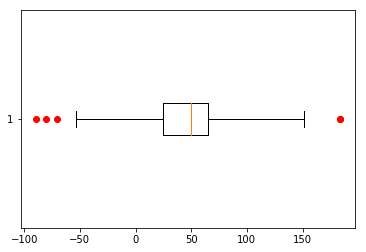

In [20]:
plt.boxplot(data, 0,'ro', 0, 2.25)

## Elliptic Envelope

In [23]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
X = load_boston()['data'][:, [5, 12]]
clf = EllipticEnvelope(contamination=0.261)
clf.fit(X)
clf = EllipticEnvelope(contamination=0.1)


AttributeError: 'EllipticEnvelope' object has no attribute 'plot'

In [24]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
X = load_boston()['data'][:, [5, 12]]
clf = OneClassSVM(nu=0.261, gamma=0.05)
clf.fit(X)

NameError: name 'OneClassSVM' is not defined

In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

rng = np.random.RandomState(42)

# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()

ImportError: cannot import name 'LocalOutlierFactor'